## Étape n°1 : Récupérer les jeux de données

In [3]:
import pandas as pd

In [4]:
df_anim = pd.read_csv("df_anim.csv")
df_anim.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


In [5]:
df_veg = pd.read_csv("df_veg.csv")
df_veg.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


In [6]:
df_pop = pd.read_csv("df_pop.csv")
df_pop.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations


## Étape n°2 : Nettoyage et préparation des données

#### 1) Nettoyer les titres de colonnes :

In [7]:
def nettoyer_data(data):
    data = data.rename(columns=lambda x: x.replace(' ', '_')) 
    data = data.rename(columns=lambda x: x.lower()) 
    data = data.rename(columns=lambda x: x.strip()) 
    return(data)

In [8]:
df_anim = nettoyer_data(df_anim)

In [9]:
df_veg = nettoyer_data(df_veg)

In [10]:
df_pop = nettoyer_data(df_pop)

#### 2) Quelle sont les dimensions des jeux de données ?

In [11]:
df_anim.shape

(31542, 14)

In [12]:
df_veg.shape

(93458, 14)

In [13]:
df_pop.shape

(366, 14)

#### 3) A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [14]:
# Already done !!

#### 4) Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’

In [15]:
df_anim = df_anim.assign(type = 'animal')

In [16]:
df_anim.head()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value,animal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value,animal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value,animal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value,animal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value,animal


In [17]:
df_veg = df_veg.assign(type = 'vegetal')

In [18]:
df_veg.head()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value,vegetal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value,vegetal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value,vegetal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value,vegetal


#### regroupez les deux jeux de données en 1 et appelez ce DataFrame product.

In [19]:
df_anim.columns

Index(['domain_code', 'domain', 'area_code_(fao)', 'area', 'element_code',
       'element', 'item_code_(fao)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'type'],
      dtype='object')

In [20]:
df_veg.columns

Index(['domain_code', 'domain', 'area_code_(fao)', 'area', 'element_code',
       'element', 'item_code_(fao)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'type'],
      dtype='object')

In [21]:
product = pd.concat([df_veg, df_anim],ignore_index=True)


In [22]:
product.shape

(125000, 15)

In [23]:
product.head()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value,vegetal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value,vegetal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value,vegetal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value,vegetal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value,vegetal


In [24]:
product.tail()

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
124995,FBS,Food Balances (2010-),181,Zimbabwe,664,Food supply (kcal/capita/day),2775,Aquatic Plants,2019,2019,kcal/capita/day,0.0,E,Estimated value,animal
124996,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.0,E,Estimated value,animal
124997,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2019,2019,g/capita/day,0.0,E,Estimated value,animal
124998,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.0,E,Estimated value,animal
124999,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2775,Aquatic Plants,2019,2019,g/capita/day,0.0,E,Estimated value,animal


In [25]:
product.columns

Index(['domain_code', 'domain', 'area_code_(fao)', 'area', 'element_code',
       'element', 'item_code_(fao)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'type'],
      dtype='object')

#### 5) Transformez df_pop

In [26]:
df_pop.head(10)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations
5,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,43053.05,X,Figure from international organizations
6,FBS,Food Balances (2010-),7,Angola,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,30810.00,X,Figure from international organizations
7,FBS,Food Balances (2010-),7,Angola,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,31825.29,X,Figure from international organizations
8,FBS,Food Balances (2010-),8,Antigua and Barbuda,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,96.00,X,Figure from international organizations
9,FBS,Food Balances (2010-),8,Antigua and Barbuda,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,97.12,X,Figure from international organizations


In [27]:

mycolumns = ["area_code_(fao)","area","year", "value"]
df_pop = df_pop[mycolumns]
df_pop.head()


,area_code_(fao),area,year,value
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00


In [28]:
df_pop = df_pop.rename(columns={'value': 'pop_1000_hab'})

In [29]:
df_pop.head()

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00


#### 6) Transformez products

In [30]:
mycolumns2 = ["area_code_(fao)","area", "year","element", "item" , "type", "unit" ,"value"]
product = product[mycolumns2]
product.head()

,area_code_(fao),area,year,element,item,type,unit,value
0,2,Afghanistan,2018,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,kg,160.12
1,2,Afghanistan,2019,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,kg,158.95
2,2,Afghanistan,2018,Food supply (kcal/capita/day),Wheat and products,vegetal,kcal/capita/day,1372.02
3,2,Afghanistan,2019,Food supply (kcal/capita/day),Wheat and products,vegetal,kcal/capita/day,1361.66
4,2,Afghanistan,2018,Protein supply quantity (g/capita/day),Wheat and products,vegetal,g/capita/day,37.00


#### 7) Fusionnez df_pop avec products

In [31]:
df = pd.merge(df_pop, product, on =['area_code_(fao)','area','year'])

In [32]:
df.head()

,area_code_(fao),area,year,pop_1000_hab,element,item,type,unit,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,kg,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,kcal/capita/day,1372.02
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,g/capita/day,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,g/capita/day,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,kg,19.78


In [33]:
df = df.drop('unit', axis = 1)

In [34]:
df.head()

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78


#### 8) Quelles sont les types de données de chaque colonne ?

In [35]:
df.dtypes

area_code_(fao)      int64
area                object
year                 int64
pop_1000_hab       float64
element             object
item                object
type                object
value              float64
dtype: object

#### 9) Combien y-a t’il de valeurs manquantes par variable ?

In [36]:
# Count the number of missing values per variable
missing_values_per_variable = df.isnull().sum()

# Display the result
print(missing_values_per_variable)

area_code_(fao)    0
area               0
year               0
pop_1000_hab       0
element            0
item               0
type               0
value              0
dtype: int64


In [37]:
# Identify rows that contain the string 'ba'
# rows_with_string = df[df['area'].str.contains(r'\bO\b')]


#### 10) Les valeurs aberrantes ?

In [38]:
df.describe()

,area_code_(fao),year,pop_1000_hab,value
count,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,128.742184,2018.508584,5.143125e+04,11.001024
std,75.250822,0.499928,1.872539e+05,56.218072
min,1.000000,2018.000000,1.076000e+01,-0.030000
25%,66.000000,2018.000000,2.801000e+03,0.000000
50%,124.000000,2019.000000,9.965000e+03,0.190000
75%,191.000000,2019.000000,3.182529e+04,2.800000
max,351.000000,2019.000000,1.465634e+06,1779.760000


In [39]:
import matplotlib.pyplot as plt

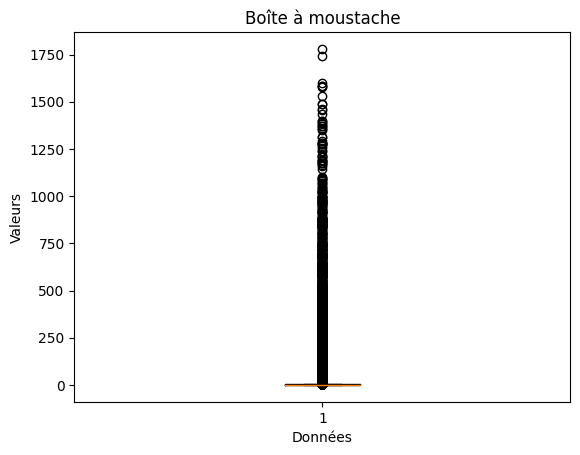

In [43]:

# Tracé de la boîte à moustache
fig, ax = plt.subplots()
ax.boxplot(df['value'])

# Ajout de titres et de labels
ax.set_title('Boîte à moustache')
ax.set_xlabel('Données')
ax.set_ylabel('Valeurs')

# Affichage de la boîte à moustache
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([data1, data2, data3])

# Ajout de titres et de labels
ax.set_title('Boîtes à moustache multiples')
ax.set_xlabel('Données')
ax.set_ylabel('Valeurs')

# Affichage du graphique
plt.show()

#### 11) Affichez les valeurs uniques de la colonne area